## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = len(pd.unique(merge_df['Mouse ID']))
total_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="first")
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_total_mice = len(pd.unique(merge_df['Mouse ID']))
clean_total_mice


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, and SEM.
grouped_drug_df = clean_df.groupby(['Drug Regimen'])
grouped_drug_mean = grouped_drug_df['Tumor Volume (mm3)'].mean()
grouped_drug_med = grouped_drug_df['Tumor Volume (mm3)'].median()
grouped_drug_var = grouped_drug_df['Tumor Volume (mm3)'].var()
grouped_drug_std = grouped_drug_df['Tumor Volume (mm3)'].std()
grouped_drug_sem = grouped_drug_df['Tumor Volume (mm3)'].sem()

#Creates the resulting series into a single summary dataframe.
drug_summary_df = pd.DataFrame({"Mean": grouped_drug_mean,
                                "Median": grouped_drug_med,
                               "Variance": grouped_drug_var,
                               "Standard Deviation": grouped_drug_std,
                               "SEM": grouped_drug_sem})
drug_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [33]:
# Using the aggregation method, produce the same summary statistics in a single line
grouped_drug_df['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

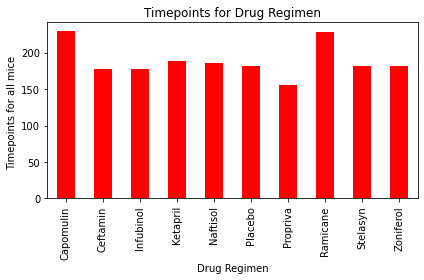

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Get attacker and defender king data
timepoint_data = grouped_drug_df['Timepoint'].count()

# Configure plot and ticks
timepoint_data.plot(kind="bar", facecolor="red")

# Set a Title and labels
plt.title("Timepoints for Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints for all mice ")
plt.tight_layout()
plt.show()


In [29]:
#broken

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_regimen = merge_df.drop_duplicates(subset='Drug Regimen', keep="first")
drug_regimen = pd.unique(drug_regimen['Drug Regimen'])
drug_regimen



#x_axis = np.arange(len(drug_regimen)
#plt.bar(x_axis, timepoint_data, color='r', align="center")


# Create the ticks for our bar chart's x axis
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, drug_regimen)

# Set the limits of the x axis
#plt.xlim(-0.75, len(x_axis)-0.25)
# Set the limits of the y axis
#plt.ylim(0, max(timepoint_data)+0.4)

#final formatting
#plt.title("Timepoints for Drug Regimen")
#plt.xlabel("Drug Regimen")
#plt.ylabel("Timepoints for all mice ")
#plt.tight_layout()
#plt.show()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

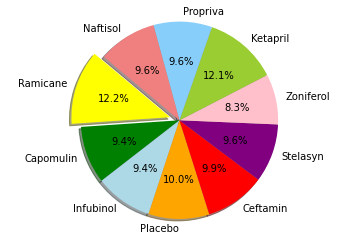

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral"]
explode = (0.1,0,0,0,0,0,0,0,0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(timepoint_data, explode=explode, labels=drug_regimen, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

temp = [14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2]
sales = [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408]

# Without scoop_price
plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black")

# BONUS: With scoop_price set to the scalar value
# scoop_price = [89, 18, 10, 28, 79, 46, 29, 38, 89, 26, 45, 62]
# plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black", s=scoop_price)

# Set the upper and lower limits of our y axis
plt.ylim(180,620)

# Set the upper and lower limits of our x axis
plt.xlim(11,26)

# Create a title, x label, and y label for our chart
plt.title("Ice Cream Sales v Temperature")
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Sales (Dollars)")

# Save an image of the chart and print to screen
# NOTE: If your plot shrinks after saving an image,
# update matplotlib to 2.2 or higher,
# or simply run the above cells again.
plt.savefig("../Images/IceCreamSales.png")
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression on year versus violent crime rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)

# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * year + vc_int